In [44]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Set visualizations to appear in the notebook
%matplotlib inline

2. Data Loading & Initial Inspection

In [45]:
# Load the Dataset 
df = pd.read_csv('imdb_top_1000.csv')

#Display 1st 5 rows
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [46]:
# Dataset Information
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [47]:
# Check dataset shape
print(f"\n Shape of Dataset : {df.shape}")


 Shape of Dataset : (1000, 16)


3. Data Cleaning & Preprocessing
   We observe several columns with missing values and inappropriate data types

        1.Certificate, Meta_score, and Gross contain nulls.
        2.Released_Year, Runtime, and Gross need type conversion.

In [48]:
# 1. Handle Missing Values in 'Certificate'
# Filling missing certificates with 'Not Rated' as it's a safe assumption for unlabelled data
df['Certificate'] = df['Certificate'].fillna('Not Rated')

In [49]:
# 2. Clean and Convert 'Runtime'
# Remove ' min' suffix and convert to float
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

In [50]:
# 3. Clean and Convert 'Released_Year'
# Drop rows with missing or invalid year, then convert to numeric
df = df.dropna(subset=['Released_Year'])
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
# Convert year to datetime object (optional, but good practice)
df['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y').dt.year

In [51]:
# 4. Clean and Convert 'Gross'
# Remove commas and convert to numeric
df['Gross'] = df['Gross'].astype(str).str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

In [52]:
# Impute missing 'Gross' and 'Meta_score' with Median (robust to outliers)
df['Gross'] = df['Gross'].fillna(df['Gross'].median())
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].median())

In [53]:
# 5. Feature Engineering: Gross in Millions
df['Gross_Million'] = df['Gross'] / 1000000

In [54]:
# 6. Final Check
print("Missing Values after cleaning:")
df.isnull().sum()

Missing Values after cleaning:


Poster_Link      0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
Gross_Million    0
dtype: int64

In [55]:
print(f"\nFinal Shape: {df.shape}")


Final Shape: (1000, 17)


4. Exploratory Data Analysis

   4.1 Univariate Analysis:
   Lets look at the distribution of the key numerical variables: IMDB Rating, Runtime, Meta Score, and Gross Revenue.

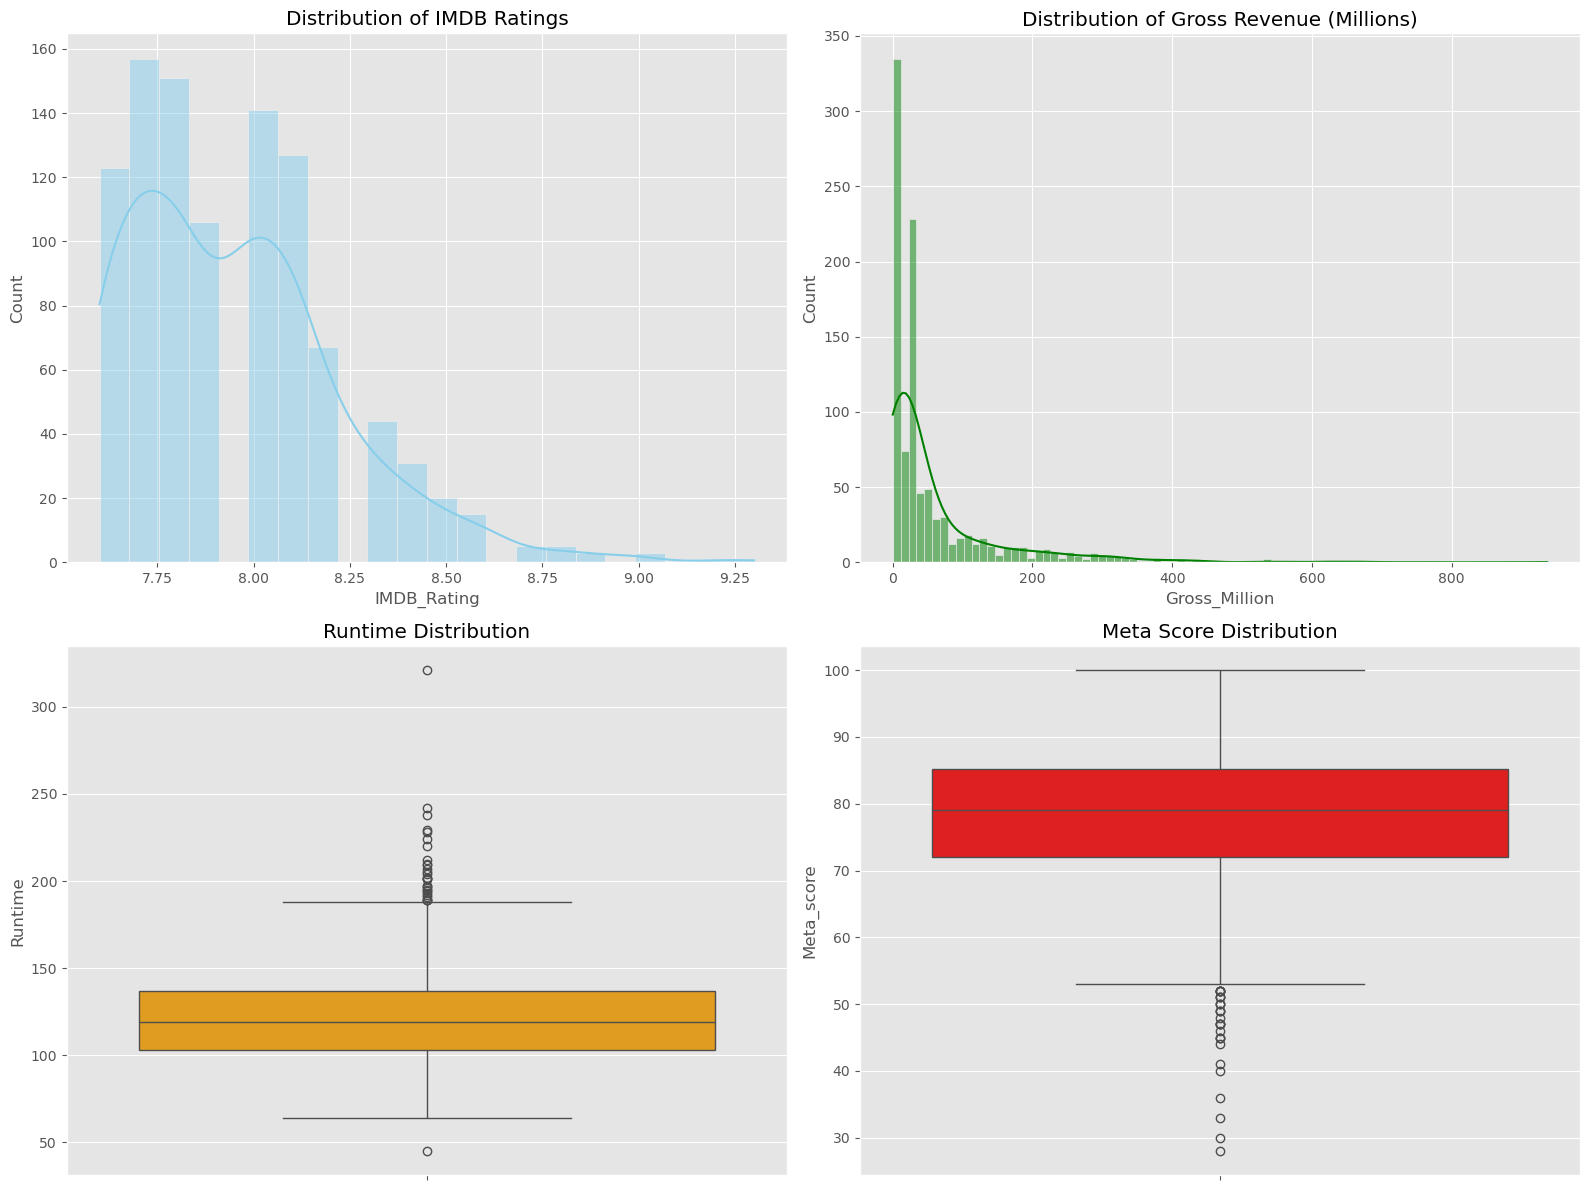

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. IMDB Rating Distribution
sns.histplot(df['IMDB_Rating'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of IMDB Ratings')

# 2. Gross Revenue Distribution
sns.histplot(df['Gross_Million'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Gross Revenue (Millions)')

# 3. Runtime Distribution (Boxplot)
sns.boxplot(y=df['Runtime'], ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Runtime Distribution')

# 4. Meta Score Distribution (Boxplot)
sns.boxplot(y=df['Meta_score'], ax=axes[1, 1], color='red')
axes[1, 1].set_title('Meta Score Distribution')

plt.tight_layout()
plt.show()

Insights:

    1. IMDB Rating: The ratings are left-skewed, with the majority falling between 7.6 and 8.2.
    2. Gross Revenue: Highly right-skewed, indicating few blockbuster movies earn significantly more than average.
    3. Meta Score: Detailed distribution shows outliers on the lower end.
    4. Runtime: The median runtime is around 130 minutes, with some outliers excedding 200 minutes.

4.2 Certificate Analysis

    Which movie Certificates are most common in the top 1000 list?

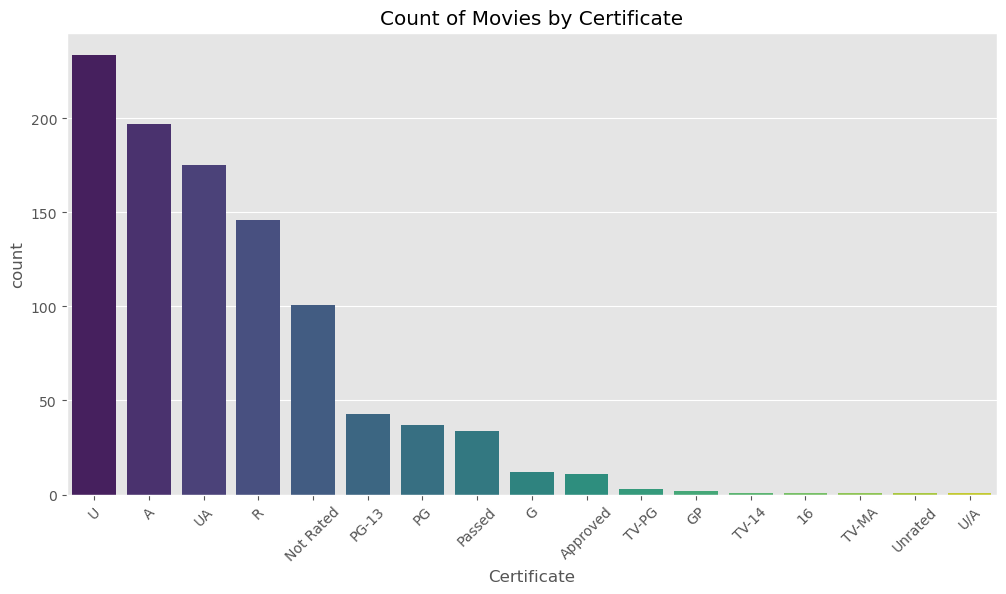

In [60]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Certificate', data=df, order=df['Certificate'].value_counts().index, palette='viridis')
plt.title('Count of Movies by Certificate')
plt.xticks(rotation=45)
plt.show()

4.3 Genre Analysis

    Movies often have multiple genres(eg. "Action, Adventure, Sci-Fi").
    To analyze them properly we need to split and explode the Genre column so that each genre counts.

In [61]:
# Preprocessing Genre Column
df['Genre'] = df['Genre'].str.strip()  # Clean whitespace
df['Genre'] = df['Genre'].str.split(', ') # Split strings into lists

# Explode the dataframe to have one genre per row
df_exploded = df.explode('Genre')
print(f"Rows after exploding Genre: {df_exploded.shape[0]}")

Rows after exploding Genre: 2541


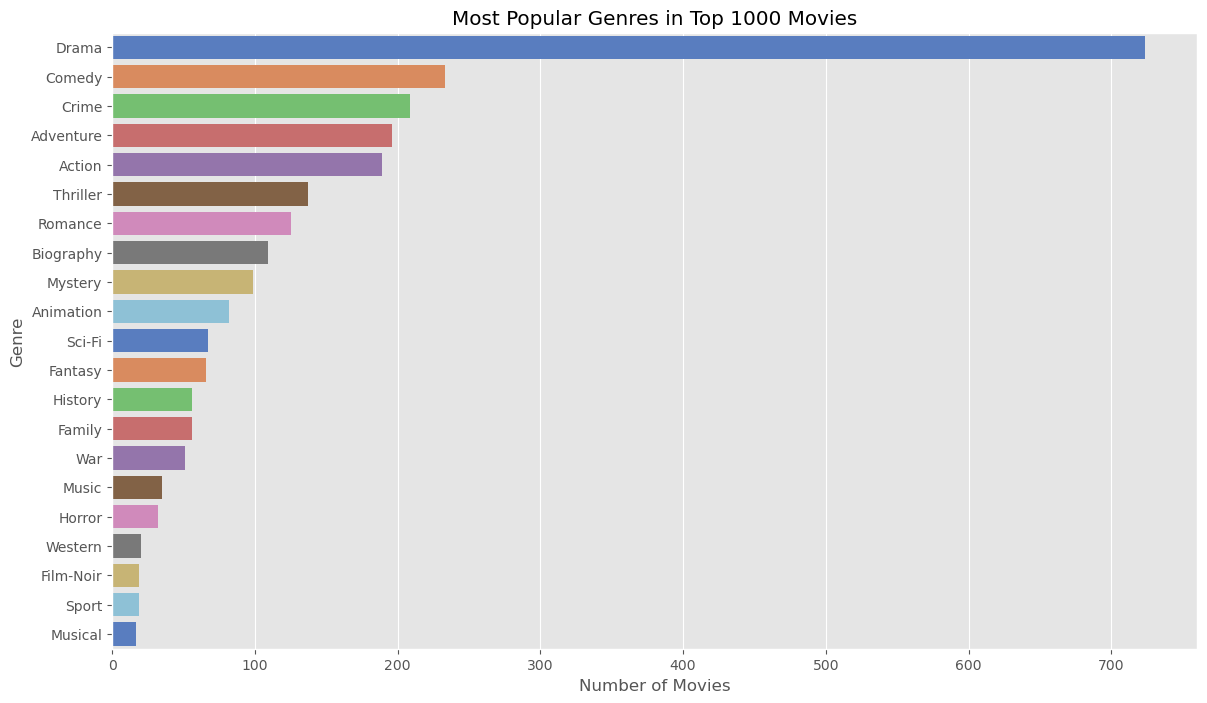

In [62]:
plt.figure(figsize=(14, 8))
# Plotting Genre Counts
sns.countplot(y='Genre', data=df_exploded, order=df_exploded['Genre'].value_counts().index, palette='muted')
plt.title('Most Popular Genres in Top 1000 Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

4.4 Success by Genre: Rating and Revenue

    Which genres are critically acclaimed, and which are commercially successful.

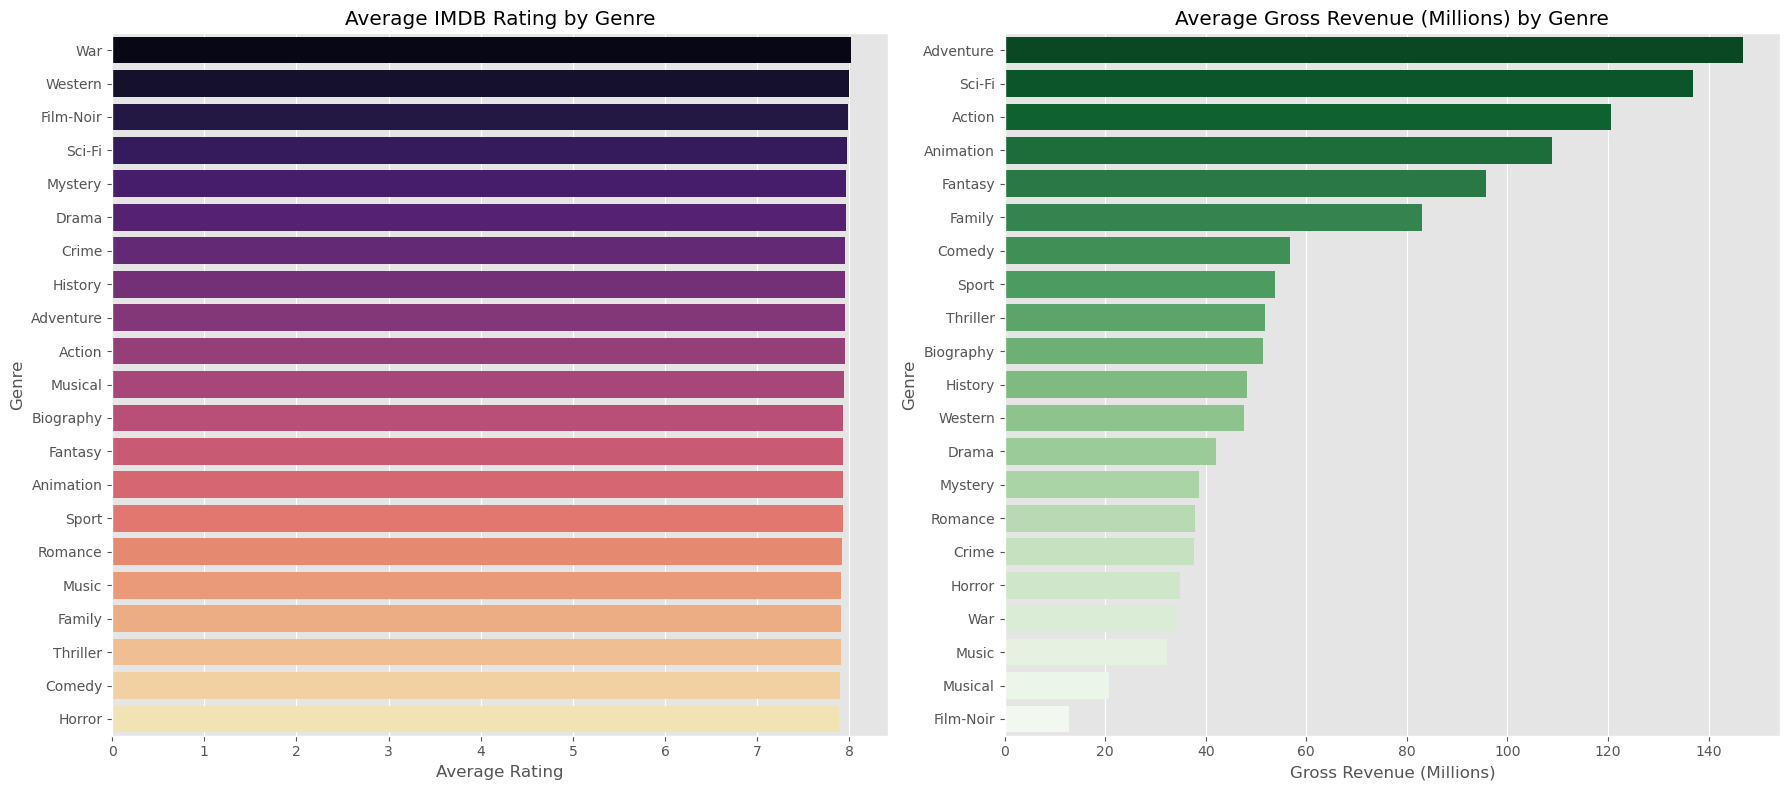

In [63]:
# Calculating means for Rating and Gross by Genre
genre_ratings = df_exploded.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
genre_gross = df_exploded.groupby('Genre')['Gross_Million'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Average Rating by Genre
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, ax=axes[0], palette='magma')
axes[0].set_title('Average IMDB Rating by Genre')
axes[0].set_xlabel('Average Rating')

# 2. Average Gross by Genre
sns.barplot(x=genre_gross.values, y=genre_gross.index, ax=axes[1], palette='Greens_r')
axes[1].set_title('Average Gross Revenue (Millions) by Genre')
axes[1].set_xlabel('Gross Revenue (Millions)')

plt.tight_layout()
plt.show()